In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
from PIL.ExifTags import TAGS
from statsmodels.distributions.empirical_distribution import ECDF

In [15]:
april_pure_1 = cv2.imread("april_tag_pure_1.png", 0)

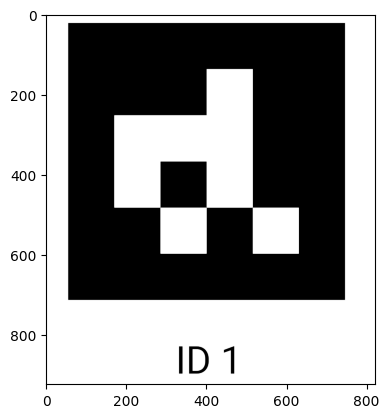

In [3]:
plt.imshow(april_pure_1, cmap="Greys_r")
plt.show()

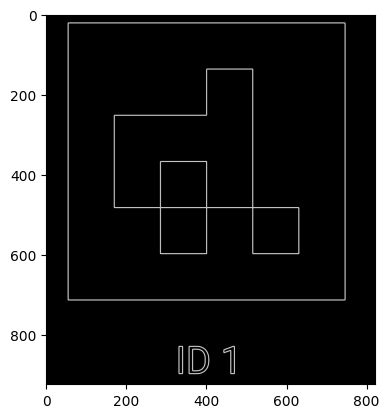

In [4]:
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype="float")

horiz_sobel_img = cv2.filter2D((april_pure_1 / 255.0), -1, kernel=sobel_kernel)
vert_sobel_img = cv2.filter2D((april_pure_1 / 255.0), -1, kernel=sobel_kernel.T)

plt.imshow(np.sqrt((horiz_sobel_img**2) + (vert_sobel_img**2)), cmap="Greys_r")
plt.show()

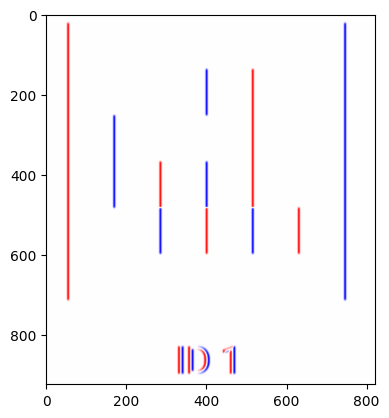

In [23]:
stand_dev = 2
half_region = int(3 * stand_dev)
full_region = (2 * half_region) + 1

v = np.arange(-1 * half_region, half_region + 1)[::-1]
v = v.reshape(v.shape[0], 1)
v = np.repeat(v, full_region, axis=1)

u = -1 * v.T

non_sqrt_euc = (v**2 + u**2)

def calc_DoG_kernel(directional_offsets, non_sqrt_euc, sigma):
    denom = -1 * (directional_offsets / (2 * np.pi * (sigma**2)))
    num = np.exp((-1 * non_sqrt_euc) / (2 * (sigma**2)))
    return denom * num

horiz_DoG_kernel = calc_DoG_kernel(u, non_sqrt_euc, stand_dev)
vert_DoG_kernel = calc_DoG_kernel(v, non_sqrt_euc, stand_dev)

horiz_DoG_img = cv2.filter2D((april_pure_1 / 255.0), -1, kernel=horiz_DoG_kernel)
vert_DoG_img = cv2.filter2D((april_pure_1 / 255.0), -1, kernel=vert_DoG_kernel)

plt.imshow(horiz_DoG_img, cmap="bwr")
plt.show()

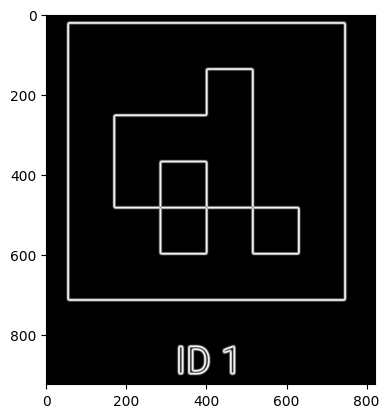

In [9]:
plt.imshow(np.sqrt(vert_DoG_img**2 + horiz_DoG_img**2), cmap="Greys_r")
plt.show()

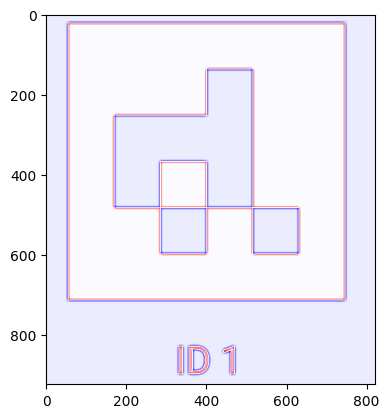

In [11]:
stand_dev = 2
half_region = int(3 * stand_dev)
full_region = (2 * half_region) + 1

v = np.arange(-1 * half_region, half_region + 1)[::-1]
v = v.reshape(v.shape[0], 1)
v = np.repeat(v, full_region, axis=1)

u = -1 * v.T

non_sqrt_euc = (v**2 + u**2)

def calc_LoG_kernel(non_sqrt_euc, sigma):
    first_term = 1 / (np.pi * (sigma**4))
    second_term = (non_sqrt_euc / (2 * (sigma**2))) - 1
    third_term = np.exp((-1 * non_sqrt_euc) / (2 * (sigma**2)))
    return first_term * second_term * third_term

LoG_kernel = calc_LoG_kernel(non_sqrt_euc, stand_dev)

LoG_img = cv2.filter2D((april_pure_1 / 255.0), -1, kernel=LoG_kernel)

plt.imshow(LoG_img, cmap="bwr")
plt.show()

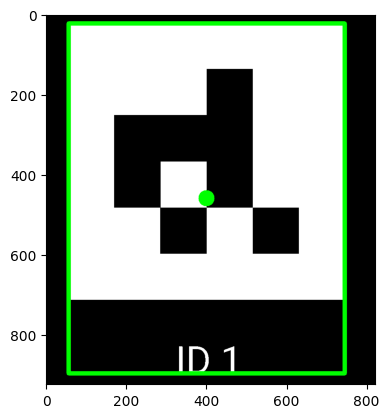

In [14]:
tag_for_thresh = cv2.imread("april_tag_pure_1.png", 0)
cube_thresh_img = (tag_for_thresh <= 50).astype(np.float32)
white_pixels = np.argwhere(cube_thresh_img == 1)
min_v, min_u = white_pixels.min(axis=0)
max_v, max_u = white_pixels.max(axis=0)

mid_u = int((max_u + min_u) / 2)
mid_v = int((max_v + min_v) / 2)

cube_thresh_img = cv2.cvtColor(cube_thresh_img, cv2.COLOR_GRAY2RGB)
cv2.rectangle(
    cube_thresh_img,
    (min_u, min_v), (max_u, max_v),
    (0.0, 1.0, 0.0), 10
)
cv2.circle(img=cube_thresh_img, center=(mid_u, mid_v), radius=20, color=(0.0, 1.0, 0.0), thickness=-1)

plt.imshow(cube_thresh_img)
plt.show()

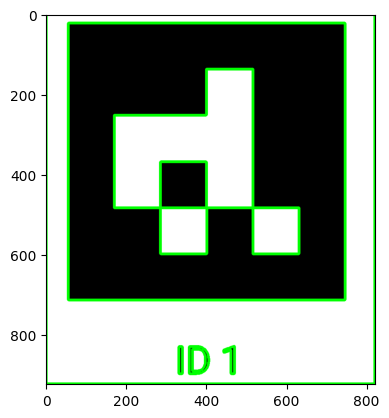

In [16]:
tag_for_contours = cv2.imread("april_tag_pure_1.png", 0)

nd_contours, nd_cont_hierarchy = cv2.findContours(
    tag_for_contours, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE
)

tag_for_contours = cv2.cvtColor(tag_for_contours, cv2.COLOR_GRAY2RGB)

cv2.drawContours(tag_for_contours, nd_contours, -1, (0, 255, 0), 5)

plt.imshow(tag_for_contours)
plt.show()

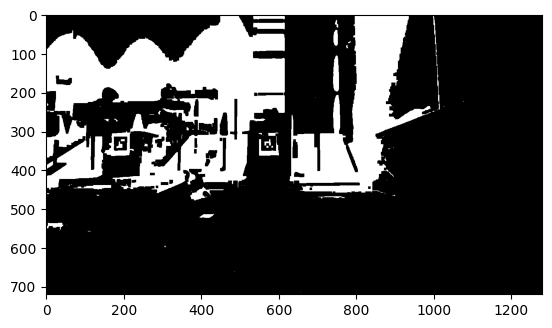

In [18]:
img2 = cv2.imread("frc_live_grid_shot.jpg", 0)
thresh_img = (cv2.equalizeHist(img2) >= 200).astype("uint8")
closing_kernel = np.ones((7, 7), np.uint8)
closing_image = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, closing_kernel)
plt.imshow(closing_image, cmap="Greys_r")
plt.show()